# TD

In [20]:
import numpy as np
from collections import defaultdict
from gensim import corpora, models
from gensim.matutils import sparse2full
from sompy import SOMFactory

def train_som(file_name):
    with open(file_name, 'r', encoding='utf-8') as f:
        combined_paragraphs = f.readlines()

    stoplist = set('stopwords.txt'.split(' '))

    texts = [[word.replace(".", "").replace(",", "") for word in document.lower().split()]
             for document in combined_paragraphs]

    texts = [[word for word in text if (word not in stoplist and len(word) > 2)]
             for text in texts]

    to_delete = []
    for i in range(len(texts)):
        t = texts[i]
        test = [w for w in t if w.isalpha()]
        if len(test) < 20:
            to_delete.append(i)
        else:
            texts[i] = test

    for i in sorted(to_delete, reverse=True):
        del texts[i]
        del combined_paragraphs[i]

    # Count word frequencies
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1

    processed_corpus = [[token for token in text if frequency[token] > 5] for text in texts]

    dictionary = corpora.Dictionary(processed_corpus)
    bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

    tfidf = models.TfidfModel(bow_corpus)
    feature1 = []
    for bow_doc in bow_corpus:
        tfidf_doc = tfidf[bow_doc]
        vec = sparse2full(tfidf_doc, len(dictionary))
        vec = np.array(vec)
        feature1.append(vec)

    feature_matrix = np.array(feature1)

    # Save feature_matrix to .npy file
    np.save('feature_matrixTD.npy', feature_matrix)

    mapsize = [40, 40]
    som = SOMFactory.build(
        feature_matrix, mapsize, mask=None, mapshape='planar', lattice='rect',
        normalization='var', initialization='pca', neighborhood='gaussian',
        training='batch', name='sompy'
    )

    som.train(n_job=1, verbose='info', train_rough_len=100, train_finetune_len=30)

    return som

In [1]:
from nltk.corpus import stopwords
import gensim

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
ENGLISH_WORDS = set(nltk.corpus.words.words())
STEMMER = PorterStemmer()
LEMMATIZER = WordNetLemmatizer()
STOP_WORDS = set(stopwords.words('english'))

In [4]:
def get_stemmed_doc(words):
    filtered = []
    for w in words:
        if w not in STOP_WORDS:
            stem = STEMMER.stem(w)
            if stem in ENGLISH_WORDS:
                filtered.append(stem)
            else:
                lemma = LEMMATIZER.lemmatize(w)
                if lemma in ENGLISH_WORDS:
                    filtered.append(lemma)
    return filtered

In [5]:
file_name = 'NewTD.txt'
with open(file_name, 'r', encoding='utf-8') as f:
    combined_paragraphs = f.readlines()

texts = [gensim.utils.simple_preprocess(document, min_len = 3, deacc = True)
             for document in combined_paragraphs if len(document)>5]

texts2 = [get_stemmed_doc(doc) for doc in texts]

In [7]:
texts2[0]

['order',
 'relate',
 'abstract',
 'structure',
 'nature',
 'city',
 'must',
 'first',
 'make',
 'simple',
 'distinct']

In [8]:
for i in range(len(combined_paragraphs))

SyntaxError: invalid syntax (3076559011.py, line 1)

In [28]:
texts2[9]

['element',
 'set',
 'belong',
 'together',
 'operate',
 'work',
 'together',
 'somehow',
 'call',
 'set',
 'element',
 'system']

In [13]:
from collections import defaultdict
frequency = defaultdict(int)
for text in texts2:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 5] for text in texts]

In [14]:
processed_corpus[0
            ]

['order',
 'relate',
 'these',
 'abstract',
 'nature',
 'city',
 'must',
 'first',
 'make',
 'simple']

In [16]:
from gensim import corpora
dictionary = corpora.Dictionary(processed_corpus)

In [17]:
dictionary

In [18]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

In [29]:
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [32]:
from gensim import models
tfidf = models.TfidfModel(bow_corpus)
tfidf

In [38]:
from gensim.matutils import sparse2full
import numpy as np
feature = []
for bow_doc in bow_corpus:
    tfidf_doc = tfidf[bow_doc]
    vec = sparse2full(tfidf_doc, len(dictionary))
    vec = np.array(vec)
    feature.append(vec)

In [40]:
feature[0]

array([0.4296352 , 0.15364258, 0.26276752, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [21]:
SOMTD = train_som('NewTD.txt')

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(10086 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...)
adding document #20000 to Dictionary(11060 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...)
built Dictionary(11229 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...) from 29648 documents (total 888693 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(11229 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...) from 29648 documents (total 888693 corpus positions)", 'datetime': '2023-06-06T18:44:40.858666', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #10000
PROGRESS: processing document #20000
TfidfModel lifecycl

 epoch: 93 ---> elapsed time:  14.229000, quantization error: 102.694312

 epoch: 94 ---> elapsed time:  14.313000, quantization error: 102.662740

 epoch: 95 ---> elapsed time:  14.277000, quantization error: 102.629183

 epoch: 96 ---> elapsed time:  14.401000, quantization error: 102.593931

 epoch: 97 ---> elapsed time:  14.559000, quantization error: 102.556457

 epoch: 98 ---> elapsed time:  14.619000, quantization error: 102.516294

 epoch: 99 ---> elapsed time:  14.643000, quantization error: 102.473684

 epoch: 100 ---> elapsed time:  14.609000, quantization error: 102.427984

 Finetune training...
 radius_ini: 1.250000 , radius_final: 1.000000, trainlen: 30

 epoch: 1 ---> elapsed time:  13.013000, quantization error: 102.379081

 epoch: 2 ---> elapsed time:  13.835000, quantization error: 102.375297

 epoch: 3 ---> elapsed time:  14.275000, quantization error: 102.362062

 epoch: 4 ---> elapsed time:  14.350000, quantization error: 102.349206

 epoch: 5 ---> elapsed time:  1

# Vectorize review

In [55]:
import gensim
from gensim import corpora
from gensim import models
import numpy as np
def vectorize_review(review_file, policy_file):
    # Load the review file
    with open(review_file, 'r', encoding='utf-8') as f:
        review = f.readlines()
        review_text = ' '.join(review)
    
    # Load the bottom-up data file
    with open(policy_file, 'r', encoding='utf-8') as f:
        combined_paragraphs = f.readlines()
    
    # Preprocess the bottom-up data
    stoplist = set('stopwords.txt'.split(' '))

    texts = [[word.replace(".", "").replace(",", "") for word in document.lower().split()]
             for document in combined_paragraphs]

    texts = [[word for word in text if (word not in stoplist and len(word) > 2)]
             for text in texts]

    to_delete = []
    for i in range(len(texts)):
        t = texts[i]
        test = [w for w in t if w.isalpha()]
        if len(test) < 20:
            to_delete.append(i)
        else:
            texts[i] = test

    for i in sorted(to_delete, reverse=True):
        del texts[i]
        del combined_paragraphs[i]

    # Count word frequencies
    from collections import defaultdict
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1

    # Only keep words that appear more than once
    processed_corpus = [[token for token in text if frequency[token] > 5] for text in texts]

    dictionary = corpora.Dictionary(processed_corpus)
    bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

    tfidf = models.TfidfModel(bow_corpus)

    # Preprocess the review text using the same dictionary and tfidf model
    bow_corpus_review = [dictionary.doc2bow(review_text.lower().split())]
    tfidf_corpus_review = tfidf[bow_corpus_review]

    # Convert the tfidf_corpus to a dense numpy array
    feature_review = []
    for tfidf_doc_review in tfidf_corpus_review:
        vec = gensim.matutils.sparse2full(tfidf_doc_review, len(dictionary))
        vec = np.array(vec)
        feature_review.append(vec)

    return feature_review

In [56]:
def match_review(feature_review, policy_file, som_model):
    # Load the bottom-up data file
    with open(policy_file, 'r', encoding='utf-8') as f:
        combined_paragraphs = f.readlines()

    # Project the review feature onto the SOM
    bmus = som_model.project_data(feature_review)

    # Find matching sentences from the bottom-up data
    bmus_all = som_model.project_data(feature_matrix)
    matching_indices = np.where(bmus_all == bmus)[0]
    matching_features = feature_matrix[matching_indices]

    # Print matching sentences from the bottom-up data
    featureTextIs = []
    for i in range(len(feature_matrix)):
        featureText = {}
        featureText['sen'] = combined_paragraphs[i]
        featureText['vec'] = feature_matrix[i]
        featureTextIs.append(featureText)

    my_dict = {d['sen']: d['vec'] for d in featureTextIs}
    matching_key = None
    #for key, value in my_dict.items():
        #if (value == matching_features[0]).all():
            #matching_key = key
            #break
    #return matching_key

    for key, value in my_dict.items():
        for i in range(len(matching_features)):
            if (value == matching_features[i]).all():
                print("-------------------------------" + " \n", key)

In [27]:
import pickle
review_file = 'review.txt'
policy_file = 'AllText.txt'
som_model_file = 'SOMTD.pkl'
with open(som_model_file, 'rb') as f:
    som_model = pickle.load(f)
feature_matrix = np.load('feature_matrixTD.npy')
feature_review = vectorize_review(review_file, policy_file)
matchingTD = match_review(feature_review, policy_file, som_model)
matchingTD

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(10086 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...)
adding document #20000 to Dictionary(11060 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...)
built Dictionary(11229 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...) from 29648 documents (total 888693 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(11229 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...) from 29648 documents (total 888693 corpus positions)", 'datetime': '2023-06-06T19:20:30.030996', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #10000
PROGRESS: processing document #20000
TfidfModel lifecycl

------------------------------- 
 Despite a harrowing accumulation of testimony, the legislature, so keen to succor law enforcement, did nothing to address the economic decline that was obviously fueling crime rates.

------------------------------- 
 Of course, when applying strategic design frameworks in Glasgow, the illustrated interventions are inevitably place-specific; they have to respond to the specific characteristics of this city and its past and recent history.

------------------------------- 
 Outside this U-shaped industrial and tenement area, mostly but not entirely to the west, are the outer suburbs for the middle classes, also adhering to similar development principles but grander in scale, design and landscaping.

------------------------------- 
 Other areas suffer from a mixture of poor spatial structure, poor architecture and poor landscaping, and accordingly are imageless and without identity, and indistinguishable from other city areas (Fig.

--------------------

In [1]:
import pickle
som_model_file = 'sombu.pkl'
with open(som_model_file, 'rb') as f:
    SOMBU = pickle.load(f)

CACHEDIR=C:\Users\kriss\.matplotlib
Using fontManager instance from C:\Users\kriss\.matplotlib\fontlist-v330.json
Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='nor

findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STHUPO.TTF', name='STHupo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\dutchi.ttf', name='Dutch801 Rm BT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\meiryo.ttc', name='Meiryo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MAIAN.TTF', name='Maiandra GD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\eurro___.ttf', name='EuroRoman', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIFR.TTF', name='Californian FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GLSNECB.TTF', name='Gill Sans MT Ext Condensed Bold', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\yuminl.ttf', name='Yu Mincho', style='normal'

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothM.ttc', name='Yu Gothic', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\comic.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRABK.TTF', name='Franklin Gothic Book', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdanab.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.9713636363636367
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarab.ttf', name='Candara', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASMD.TTF', name='Eras Medium ITC', style='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\JUICE___.TTF', name='Juice ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoesc.ttf', name='Segoe Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\isocpeui.ttf', name='ISOCPEUR', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\romans__.ttf', name='RomanS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ALGER.TTF', name='Algerian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SIMLI.TTF', name='LiSu', style='normal', variant='normal', weight=400, st

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candara.ttf', name='Candara', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCCB___.TTF', name='Rockwell Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Dengb.ttf', name='DengXian', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\AMGDT___.ttf', name='AMGDT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKB.TTF', name='Rockwell', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FZYTK.TTF', name='FZYaoTi', style='normal', variant='normal', weigh

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKEB.TTF', name='Rockwell Extra Bold', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\isocp___.ttf', name='ISOCP', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\greeks__.ttf', name='GreekS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BELLI.TTF', name='Bell MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\symeteo_.ttf', name='Symeteo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BIZ-UDMinchoM.ttc', name='BIZ UDMincho', style='normal', variant='normal'

findfont: score(FontEntry(fname='D:\\DC20\\Resource\\Font\\AdobeDevanagari-Regular.otf', name='Adobe Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNT.TTF', name='Elephant', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consola.ttf', name='Consolas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_CB.TTF', name='Bodoni MT', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\counb___.ttf', name='CountryBlueprint', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissbo.ttf', name='Swis721 BdOul 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_B.TTF', name='Bodoni MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\AGENCYR.TTF', name='Agency FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_BLAI.TTF', name='Bodoni MT', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\INFROMAN.TTF', name='Informal Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swisse.ttf', name='Swis721 Ex BT', style='normal', variant='normal', weight=400, stretch='expanded', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissl.ttf', name='Swis721 Lt BT', style='normal', variant='

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_CBI.TTF', name='Bodoni MT', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothL.ttc', name='Yu Gothic', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\arialbd.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 6.698636363636363
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuisl.ttf', name='Segoe UI', style='normal', variant='normal', weight=350, stretch='normal', size='scalable')) = 10.0975
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ENGR.TTF', name='Engravers MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelb.ttf', name='Corbel', style='normal', variant='n

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRABKIT.TTF', name='Franklin Gothic Book', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sansso__.ttf', name='SansSerif', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\syastro_.ttf', name='Syastro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOSB.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\symusic_.ttf', name='Symusic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\couri.ttf', name='Courier New', style='italic', varian

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\himalaya.ttf', name='Microsoft Himalaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiai.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisli.ttf', name='Segoe UI', style='italic', variant='normal', weight=350, stretch='normal', size='scalable')) = 11.0975
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbd.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRSCRIPT.TTF', name='French Script MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguiemj.ttf', name='Segoe UI Emoji', style='normal

findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='D:\\ana

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STKAITI.TTF', name='STKaiti', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Artifakt Element Italic.ttf', name='Artifakt Element', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Artifakt Element Bold.ttf', name='Artifakt Element', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuib.ttf', name='Segoe UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LHANDW.TTF', name='Lucida Handwriting', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='D:\\DC20\\Resource\\Font\\AdobeDevanagar

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\tahomabd.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\KUNSTLER.TTF', name='Kunstler Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariblk.ttf', name='Arial', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 6.888636363636364
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swisscbo.ttf', name='Swis721 BdCnOul BT', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simhei.ttf', name='SimHei', style='normal', va

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASBD.TTF', name='Eras Bold ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\monosi.ttf', name='Monospac821 BT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cityb___.ttf', name='CityBlueprint', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\palabi.ttf', name='Palatino Linotype', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCCM____.TTF', name='Tw Cen MT Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALNBI.TTF', name='Arial', style='it

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GILLUBCD.TTF', name='Gill Sans Ultra Bold Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mtproxy5.ttf', name='Proxy 5', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STFANGSO.TTF', name='STFangsong', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GILSANUB.TTF', name='Gill Sans Ultra Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\AIGDT___.TTF', name='AIGDT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='ita

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissci.ttf', name='Swis721 Cn BT', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\palab.ttf', name='Palatino Linotype', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALNB.TTF', name='Arial', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 6.8986363636363635
findfont: score(FontEntry(fname='D:\\DC20\\Resource\\Font\\AdobeDevanagari-Bold.otf', name='Adobe Devanagari', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunbd.ttf', name='Malgun Gothic', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CHILLER.TTF',

findfont: score(FontEntry(fname='C:\\Users\\kriss\\AppData\\Local\\Microsoft\\Windows\\Fonts\\FOT-MatissePro-EB.otf', name='FOT-Matisse Pro', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MSUIGHUR.TTF', name='Microsoft Uighur', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\romant__.ttf', name='RomanT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_CI.TTF', name='Bodoni MT', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STLITI.TTF', name='STLiti', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothR.ttc

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOOKOSI.TTF', name='Bookman Old Style', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeprb.ttf', name='Segoe Print', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibriz.ttf', name='Calibri', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LFAXDI.TTF', name='Lucida Fax', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\greekc__.ttf', name='GreekC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambria.ttc', name='Cambria', style='normal', variant='normal

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\REFSAN.TTF', name='MS Reference Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MTCORSVA.TTF', name='Monotype Corsiva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GLECB.TTF', name='Gloucester MT Extra Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\isocpeur.ttf', name='ISOCPEUR', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\OLDENGL.TTF', name='Old English Text MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibri.ttf', name='

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segmdl2.ttf', name='Segoe MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BKANT.TTF', name='Book Antiqua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIST.TTF', name='Calisto MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsunb.ttf', name='SimSun-ExtB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUAI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SIMYOU.TTF', name='YouYuan', style='normal', variant='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STSONG.TTF', name='STSong', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\isocteui.ttf', name='ISOCTEUR', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PRISTINA.TTF', name='Pristina', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_I.TTF', name='Bodoni MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SHOWG.TTF', name='Showcard Gothic', style='normal', variant='normal', weight=400, 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Montserrat-Regular.ttf', name='Montserrat', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbel.ttf', name='Corbel', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ntailu.ttf', name='Microsoft New Tai Lue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\stylu.ttf', name='Stylus BT', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='D:\\Program Files\\Rhino 7\\System\\SLF-RHN Architect.ttf', name='SLF-RHN Architect', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STXIHEI.TTF', name='

findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='D:\\ana

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissb.ttf', name='Swis721 BT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\romai___.ttf', name='Romantic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolaz.ttf', name='Consolas', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\monosb.ttf', name='Monospac821 BT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PARCHM.TTF', name='Parchment', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HTOWERT.TTF', name='High Tower Text', style='normal', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swisscli.ttf', name='Swis721 LtCn BT', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GILBI___.TTF', name='Gill Sans MT', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mtproxy3.ttf', name='Proxy 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swiss.ttf', name='Swis721 BT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolab.ttf', name='Consolas', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\taileb.ttf', name='Microsoft Tai Le', style='normal', vari

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOSI.TTF', name='Goudy Old Style', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STXINGKA.TTF', name='STXingkai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swisscl.ttf', name='Swis721 LtCn BT', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\meiryob.ttc', name='Meiryo', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisym.ttf', name='Segoe UI Symbol', style='norma

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FELIXTI.TTF', name='Felix Titling', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\italicc_.ttf', name='ItalicC', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sanss___.ttf', name='SansSerif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LEELAWAD.TTF', name='Leelawadee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STZHONGS.TTF', name='STZhongsong', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\comici.ttf', name='Comic Sans MS', style='italic', variant='nor

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspa.ttf', name='Microsoft PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALIFB.TTF', name='Californian FB', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhbd.ttc', name='Microsoft YaHei', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LSANS.TTF', name='Lucida Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGSOL.TTF', name='Niagara Solid', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RAGE.TTF', name='Rage Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucit.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\compi.ttf', name='CommercialPi BT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HARNGTON.TTF', name='Harrington', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissek.ttf', name='Swis721 BlkEx BT', style='normal', variant='normal', weight=400, stretch='expanded', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gothicg_.ttf', name='GothicG', style='normal', variant

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHICBI.TTF', name='Century Gothic', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\yumindb.ttf', name='Yu Mincho', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swisscki.ttf', name='Swis721 BlkCn BT', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GIGI.TTF', name='Gigi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BIZ-UDGothicR.ttc', name='BIZ UDGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Artifakt Element Bold Italic.ttf', name='Artifakt Ele

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDYSTO.TTF', name='Goudy Stout', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\wingding.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRUSHSCI.TTF', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\scriptc_.ttf', name='ScriptC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mtproxy6.ttf', name='Proxy 6', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BSSYM7.TTF', name='Bookshelf Symbol 7', style='normal', variant

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\monosbi.ttf', name='Monospac821 BT', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucbi.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbd.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GARA.TTF', name='Garamond', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FORTE.TTF', name='Forte', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiab.ttf', name='Georgia', style='normal', variant='normal',

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibrib.ttf', name='Calibri', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FREESCPT.TTF', name='Freestyle Script', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRADMIT.TTF', name='Franklin Gothic Demi', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarali.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LFAXD.TTF', name='Lucida Fax', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALISTB.TTF', name='Calisto MT', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibl.ttf', name='Segoe UI', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NirmalaS.ttf', name='Nirmala UI', style='normal', variant='normal', weight=350, stretch='normal', size='scalable')) = 10.0975
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\isocp3__.ttf', name='ISOCP3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LATINWD.TTF', name='Wide Latin', style='normal', variant='normal', weight=400, stretch='expanded', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhl.ttc', name='Microsoft YaHei', style='normal', variant='normal', weight=290, stretch='normal', size='scalable')) = 10.1545
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUAB.TTF', name='Book Antiqua', style='normal', variant='n

findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotl

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARLRDBD.TTF', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MISTRAL.TTF', name='Mistral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALISTBI.TTF', name='Calisto MT', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COOPBL.TTF', name='Cooper Black', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissko.ttf', name='Swis721 BlkOul BT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', varia

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PLAYBILL.TTF', name='Playbill', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\phagspab.ttf', name='Microsoft PhagsPa', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\bgothm.ttf', name='BankGothic Md BT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\bahnschrift.ttf', name='Bahnschrift', style='norma

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelli.ttf', name='Corbel', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LSANSDI.TTF', name='Lucida Sans', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msgothic.ttc', name='MS Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\marlett.ttf', name='Marlett', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mtproxy2.ttf', name='Proxy 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\lucon.ttf', name='Lucida Console', style='normal', variant='normal', wei

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNTI.TTF', name='Elephant', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissli.ttf', name='Swis721 Lt BT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\WINGDNG3.TTF', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FTLTLT.TTF', name='Footlight MT Light', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesi.ttf', name='Times New Roman', style='italic', v

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LEELAWDB.TTF', name='Leelawadee', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\RAVIE.TTF', name='Ravie', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NirmalaB.ttf', name='Nirmala UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\dutchbi.ttf', name='Dutch801 Rm BT', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SitkaI.ttc', name='Sitka Small', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\techl___.ttf', name='TechnicLite', style='normal', variant='norma

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cour.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\pala.ttf', name='Palatino Linotype', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LBRITEDI.TTF', name='Lucida Bright', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ebrimabd.ttf', name='Ebrima', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissk.ttf', name='Swis721 Blk BT', style='normal', variant='normal'

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Artifakt Element Regular.ttf', name='Artifakt Element', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\isocteur.ttf', name='ISOCTEUR', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\scripts_.ttf', name='ScriptS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCCEB.TTF', name='Tw Cen MT Condensed Extra Bold', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\romand__.ttf', name='RomanD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\txt_____.ttf', name='Txt', st

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeui.ttf', name='Segoe UI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SCHLBKB.TTF', name='Century Schoolbook', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ebrima.ttf', name='Ebrima', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERTIBD.TTF', name='Perpetua Titling MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\kriss\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Deleted\\FOT-MatissePro-EB.otf', name='FOT-Matisse Pro', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Window

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gothici_.ttf', name='GothicI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SCHLBKBI.TTF', name='Century Schoolbook', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FZSTK.TTF', name='FZShuTi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKI.TTF', name='Rockwell', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambriab.ttf', name='Cambria', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sanssb__.ttf', name='SansSerif', style='normal', variant='normal', we

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\complex_.ttf', name='Complex', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\dutchb.ttf', name='Dutch801 Rm BT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Montserrat-Medium.ttf', name='Montserrat', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LSANSI.TTF', name='Lucida Sans', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\holomdl2.ttf', name='HoloLens MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal'

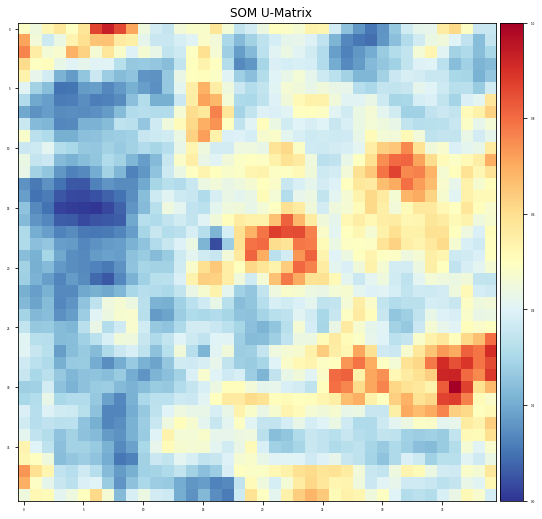

([],
 array([[8.11848051, 7.88024218, 8.36605165, ..., 8.15173542, 7.31714337,
         7.31407002],
        [9.52572419, 7.93100566, 7.3628232 , ..., 7.22979408, 6.58801448,
         7.28006219],
        [9.83768541, 8.55139883, 7.95536476, ..., 7.00741673, 6.5992906 ,
         6.95700952],
        ...,
        [9.67679727, 8.79919774, 8.38688124, ..., 8.06642224, 7.96402124,
         8.6617697 ],
        [9.39745161, 8.13275268, 7.70716565, ..., 7.7452715 , 7.63727377,
         8.32687724],
        [7.87208298, 8.34455165, 8.30042305, ..., 8.30763096, 8.05453479,
         7.45664744]]))

In [2]:
from sompy.visualization.mapview import View2D
import matplotlib.pyplot as plt
from sompy.visualization.hitmap import HitMapView
from sompy.visualization.umatrix import UMatrixView
umat = UMatrixView(width=40, height=40, title='SOM U-Matrix')
umat.show(SOMBU)

Loaded backend agg version unknown.
colorbar update normal <matplotlib.colors.Normalize object at 0x000001E5EF8E9190> <matplotlib.colors.Normalize object at 0x000001E5EF8E9190>
colorbar update normal <matplotlib.colors.Normalize object at 0x000001E5EF8E9190> <matplotlib.colors.Normalize object at 0x000001E5EF8E9190>
locator: <matplotlib.ticker.AutoLocator object at 0x000001E5EF8DA2E0>
locator: <matplotlib.ticker.AutoLocator object at 0x000001E5EF8DA2E0>
locator: <matplotlib.ticker.AutoLocator object at 0x000001E5EF8DA3D0>
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=3.36.
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='norma

findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='D:\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissko.ttf', name='Swis721 BlkOul BT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_CR.TTF', name='Bodoni MT', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MOD20.TTF', name='Modern No. 20', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\meiryo.ttc', name='Meiryo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MAIAN.TTF', name='Maiandra GD', style='normal', variant='normal', we

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\bgothm.ttf', name='BankGothic Md BT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\bahnschrift.ttf', name='Bahnschrift', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\isoct2__.ttf', name='ISOCT2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\framd.ttf', name='Franklin Gothic Medium', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothM.ttc', name='Yu Gothic', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\comic.ttf', name='Comic Sans MS', style='normal', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mtproxy2.ttf', name='Proxy 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\lucon.ttf', name='Lucida Console', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ZWAdobeF.TTF', name='ZWAdobeF', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SNAP____.TTF', name='Snap ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\JUICE___.TTF', name='Juice ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoesc.ttf', name='Segoe Script', style='normal', variant='normal', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesi.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyi.ttf', name='Microsoft Yi Baiti', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolai.ttf', name='Consolas', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candara.ttf', name='Candara', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCCB___.TTF', name='Rockwell Condensed', style='normal', var

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SitkaI.ttc', name='Sitka Small', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\techl___.ttf', name='TechnicLite', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\bgothl.ttf', name='BankGothic Lt BT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKEB.TTF', name='Rockwell Extra Bold', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\isocp___.ttf', name='ISOCP', style='normal', variant=

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ebrimabd.ttf', name='Ebrima', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\swissk.ttf', name='Swis721 Blk BT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NIAGENG.TTF', name='Niagara Engraved', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALISTI.TTF', name='Calisto MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='D:\\DC20\\Resource\\Font\\AdobeDevanagari-Regular.otf', name='Adobe Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ELEPHNT.TTF', name='Elephant', s

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\romand__.ttf', name='RomanD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\txt_____.ttf', name='Txt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simplex_.ttf', name='Simplex', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_B.TTF', name='Bodoni MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\AGENCYR.TTF', name='Agency FB', style='normal', variant='normal', weight=400, st

findfont: score(FontEntry(fname='C:\\Users\\kriss\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Deleted\\FOT-MatissePro-EB.otf', name='FOT-Matisse Pro', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mtproxy4.ttf', name='Proxy 4', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\panroman.ttf', name='PanRoman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LTYPEB.TTF', name='Lucida Sans Typewriter', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_CBI.TTF', name='Bodoni MT', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535
findfont: score(FontEntry(fname='C:\\Windows

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambriab.ttf', name='Cambria', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sanssb__.ttf', name='SansSerif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOOKOSB.TTF', name='Bookman Old Style', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GARAIT.TTF', name='Garamond', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msjh.ttc', name='Microsoft JhengHei', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRABKIT.TTF', name='Franklin Gothic Book', style='italic',

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\holomdl2.ttf', name='HoloLens MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCM_____.TTF', name='Tw Cen MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRAHVIT.TTF', name='Franklin Gothic Heavy', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\himalaya.ttf', name='Microsoft Himalaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiai.ttf', name='Georgia', style='it

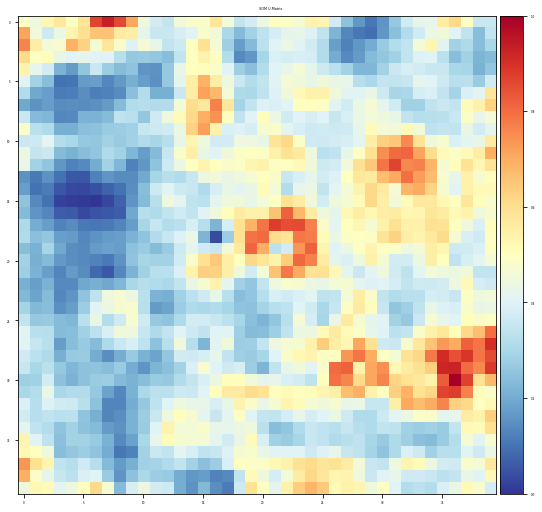

In [3]:
from sompy.visualization.mapview import View2D
import matplotlib
matplotlib.use('Agg') # This must be done before importing matplotlib.pyplot
import matplotlib.pyplot as plt
from sompy.visualization.hitmap import HitMapView
from sompy.visualization.umatrix import UMatrixView

umat = UMatrixView(width=40, height=40, title='SOM U-Matrix')
umat.show(SOMBU)

# Save as a high quality PDF
plt.gcf().savefig('SOM_UMatrixBU.pdf', format='pdf')

In [45]:
len(feature_review[0])

11229

# BU

In [79]:
import numpy as np
from collections import defaultdict
from gensim import corpora, models
from gensim.matutils import sparse2full
from sompy import SOMFactory

def train_som(file_name):
    with open(file_name, 'r', encoding='utf-8') as f:
        combined_paragraphs = f.readlines()

    stoplist = set('stopwords.txt'.split(' '))

    texts = [[word.replace(".", "").replace(",", "") for word in document.lower().split()]
             for document in combined_paragraphs]

    texts = [[word for word in text if (word not in stoplist and len(word) > 2)]
             for text in texts]

    to_delete = []
    for i in range(len(texts)):
        t = texts[i]
        test = [w for w in t if w.isalpha()]
        if len(test) < 20:
            to_delete.append(i)
        else:
            texts[i] = test

    for i in sorted(to_delete, reverse=True):
        del texts[i]
        del combined_paragraphs[i]

    # Count word frequencies
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1

    processed_corpus = [[token for token in text if frequency[token] > 5] for text in texts]

    dictionary = corpora.Dictionary(processed_corpus)
    bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

    tfidf = models.TfidfModel(bow_corpus)
    feature1 = []
    for bow_doc in bow_corpus:
        tfidf_doc = tfidf[bow_doc]
        vec = sparse2full(tfidf_doc, len(dictionary))
        vec = np.array(vec)
        feature1.append(vec)

    feature_matrix = np.array(feature1)

    # Save feature_matrix to .npy file
    np.save('feature_matrixBU.npy', feature_matrix)

    mapsize = [40, 40]
    som = SOMFactory.build(
        feature_matrix, mapsize, mask=None, mapshape='planar', lattice='rect',
        normalization='var', initialization='pca', neighborhood='gaussian',
        training='batch', name='sompy'
    )

    som.train(n_job=1, verbose='info', train_rough_len=100, train_finetune_len=30)

    return som

In [80]:
SOMBU = train_som('NewBU.txt')

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(8222 unique tokens: ['and', 'are', 'around', 'been', 'brenner']...)
adding document #20000 to Dictionary(8638 unique tokens: ['and', 'are', 'around', 'been', 'brenner']...)
built Dictionary(8638 unique tokens: ['and', 'are', 'around', 'been', 'brenner']...) from 20016 documents (total 580886 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(8638 unique tokens: ['and', 'are', 'around', 'been', 'brenner']...) from 20016 documents (total 580886 corpus positions)", 'datetime': '2023-06-06T20:18:16.663779', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #10000
PROGRESS: processing document #20000
TfidfModel lifecycle event {'msg': 'calculated IDF weights for 20016 documents and 

 epoch: 96 ---> elapsed time:  6.967000, quantization error: 90.272130

 epoch: 97 ---> elapsed time:  6.917000, quantization error: 90.225059

 epoch: 98 ---> elapsed time:  6.908000, quantization error: 90.174940

 epoch: 99 ---> elapsed time:  7.182000, quantization error: 90.121286

 epoch: 100 ---> elapsed time:  6.900000, quantization error: 90.063908

 Finetune training...
 radius_ini: 1.250000 , radius_final: 1.000000, trainlen: 30

 epoch: 1 ---> elapsed time:  6.880000, quantization error: 90.002251

 epoch: 2 ---> elapsed time:  6.947000, quantization error: 89.998916

 epoch: 3 ---> elapsed time:  7.078000, quantization error: 89.983097

 epoch: 4 ---> elapsed time:  7.031000, quantization error: 89.967788

 epoch: 5 ---> elapsed time:  7.160000, quantization error: 89.952330

 epoch: 6 ---> elapsed time:  7.063000, quantization error: 89.936756

 epoch: 7 ---> elapsed time:  6.994000, quantization error: 89.921214

 epoch: 8 ---> elapsed time:  7.059000, quantization error

In [81]:
with open('sombu.pkl', 'wb') as f:
    pickle.dump(SOMBU, f)

In [87]:
import pickle
review_file = 'review.txt'
policy_file = 'NewBU.txt'
som_model_file = 'sombu.pkl'
with open(som_model_file, 'rb') as f:
    som_model = pickle.load(f)
feature_matrix = np.load('feature_matrixBU.npy')
feature_review = vectorize_review(review_file, policy_file)
matchingBU = match_review(feature_review, policy_file, som_model)
matchingBU

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(8222 unique tokens: ['and', 'are', 'around', 'been', 'brenner']...)
adding document #20000 to Dictionary(8638 unique tokens: ['and', 'are', 'around', 'been', 'brenner']...)
built Dictionary(8638 unique tokens: ['and', 'are', 'around', 'been', 'brenner']...) from 20016 documents (total 580886 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(8638 unique tokens: ['and', 'are', 'around', 'been', 'brenner']...) from 20016 documents (total 580886 corpus positions)", 'datetime': '2023-06-06T20:58:24.372802', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #10000
PROGRESS: processing document #20000
TfidfModel lifecycle event {'msg': 'calculated IDF weights for 20016 documents and 

------------------------------- 
 Prediction is hazardous, not least because urban space continues to serve simultaneously as the arena, the medium, and the stake of ongoing struggles regarding the future of capitalism.

------------------------------- 
 Elder Johnson, Bishop Dixon, Sister Atalya—none of them knew Crystal was staying at the Lodge.

------------------------------- 
 By what right do mayors, police chiefs, military officers, and state officials tell us, the people, that they have the right to determine what is public about “our” public space and who may occupy that space when?

------------------------------- 
 By what right do mayors, police chiefs, military officers, and state officials tell us, the people, that they have the right to determine what is public about “our” public space and who may occupy that space when?



In [90]:
with open('sombu.pkl', 'rb') as f:
    somBU = pickle.load(f)

In [89]:
bmusBU = somBU.project_data(feature_review)
xy = somBU.bmu_ind_to_xy(bmusBU)
print(xy)


[[ 23  31 951]]


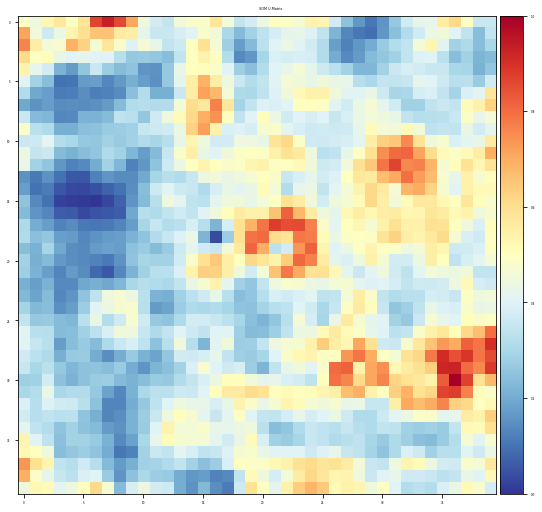

([],
 array([[8.11848051, 7.88024218, 8.36605165, ..., 8.15173542, 7.31714337,
         7.31407002],
        [9.52572419, 7.93100566, 7.3628232 , ..., 7.22979408, 6.58801448,
         7.28006219],
        [9.83768541, 8.55139883, 7.95536476, ..., 7.00741673, 6.5992906 ,
         6.95700952],
        ...,
        [9.67679727, 8.79919774, 8.38688124, ..., 8.06642224, 7.96402124,
         8.6617697 ],
        [9.39745161, 8.13275268, 7.70716565, ..., 7.7452715 , 7.63727377,
         8.32687724],
        [7.87208298, 8.34455165, 8.30042305, ..., 8.30763096, 8.05453479,
         7.45664744]]))

In [91]:
from sompy.visualization.mapview import View2D
import matplotlib.pyplot as plt
from sompy.visualization.hitmap import HitMapView
from sompy.visualization.umatrix import UMatrixView
umat = UMatrixView(width=40, height=40, title='SOM U-Matrix')
umat.show(somBU)

# Vectorize many paragraph

In [77]:
import gensim
from gensim import corpora
from gensim import models
import numpy as np

def vectorize_review(review_file, policy_file):
    # Load the review file
    with open(review_file, 'r', encoding='utf-8') as f:
        review = f.readlines()
        review_paragraphs = [paragraph.strip() for paragraph in review]

    # Load the bottom-up data file
    with open(policy_file, 'r', encoding='utf-8') as f:
        combined_paragraphs = f.readlines()

    # Preprocess the bottom-up data
    stoplist = set('stopwords.txt'.split(' '))

    texts = [[word.replace(".", "").replace(",", "") for word in document.lower().split()]
             for document in combined_paragraphs]

    texts = [[word for word in text if (word not in stoplist and len(word) > 2)]
             for text in texts]

    to_delete = []
    for i in range(len(texts)):
        t = texts[i]
        test = [w for w in t if w.isalpha()]
        if len(test) < 20:
            to_delete.append(i)
        else:
            texts[i] = test

    for i in sorted(to_delete, reverse=True):
        del texts[i]
        del combined_paragraphs[i]

    # Count word frequencies
    from collections import defaultdict
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1

    # Only keep words that appear more than once
    processed_corpus = [[token for token in text if frequency[token] > 5] for text in texts]

    dictionary = corpora.Dictionary(processed_corpus)
    bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

    tfidf = models.TfidfModel(bow_corpus)

    # Preprocess each paragraph separately
    feature_reviews = []
    for paragraph in review_paragraphs:
        bow_paragraph = [dictionary.doc2bow(paragraph.lower().split())]
        tfidf_paragraph = tfidf[bow_paragraph]

        # Convert the tfidf_corpus to a dense numpy array
        feature_paragraph = []
        for tfidf_doc_paragraph in tfidf_paragraph:
            vec = gensim.matutils.sparse2full(tfidf_doc_paragraph, len(dictionary))
            vec = np.array(vec)
            feature_paragraph.append(vec)

        feature_reviews.append(feature_paragraph)

    return feature_reviews

In [78]:
review_file = 'review3.txt'
policy_file = 'AllText.txt'

feature_reviews = vectorize_review(review_file, policy_file)


adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(10086 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...)
adding document #20000 to Dictionary(11060 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...)
built Dictionary(11229 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...) from 29648 documents (total 888693 corpus positions)
starting a new internal lifecycle event log for Dictionary
Dictionary lifecycle event {'msg': "built Dictionary(11229 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...) from 29648 documents (total 888693 corpus positions)", 'datetime': '2023-06-08T19:52:19.175177', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #100

In [79]:
len(feature_reviews)

7

In [80]:
feature_reviews

[[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)],
 [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)],
 [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)],
 [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)],
 [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)],
 [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)],
 [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]]

In [81]:
import pickle

def find_bmu(som_model, feature_reviews):
    with open(som_model, 'rb') as f:
        som = pickle.load(f)

    bmu_indices = []
    for feature_review in feature_reviews:
        bmu = som.project_data(feature_review)
        bmu_index = som.bmu_ind_to_xy(bmu)
        bmu_indices.append(bmu_index)

    return bmu_indices

In [82]:
som_model = 'somTD.pkl'

bmu_indices = find_bmu(som_model, feature_reviews)

print(bmu_indices)

[array([[  27,   34, 1114]]), array([[ 23,  31, 951]]), array([[  8,  27, 347]]), array([[  28,   26, 1146]]), array([[ 17,   6, 686]]), array([[ 24,  30, 990]]), array([[ 24,  26, 986]])]


In [1]:
with open('reviewC.txt', 'r', encoding='utf-8') as f:
        review = f.readlines()

In [2]:
len(review)

17

In [59]:
review

['It was in Cihangir (where we too would move as our fortunes dwindled) that I first learned Istanbul was not an anonymous multitude of walled-in lives—a jungle of apartments where no one knew who was dead or who was celebrating what—but an archipelago of neighborhoods in which everyone knew one another.\n',
 'When I looked out the window, I didn’t see just the Bosphorus and the ships moving slowly down the familiar channels, I also saw the gardens between the houses, old mansions that had not yet been pulled down, and children playing between their crumbling walls.\n',
 'As with so many houses that look out on the Bosphorus, there was, just in front of the building, a steep and winding cobblestone alley that went all the way down to the sea.\n',
 'On snowy evenings I would stand with my aunt and my cousin and watch from afar with the rest of the neighborhood as noisy, happy children slid down this alley on sleds, chairs, and planks of wood.\n',
 'The center of the Turkish film industr

In [57]:
import pickle
review_file = 'reviewC0.txt'
policy_file = 'AllText.txt'
som_model_file = 'somTD.pkl'
with open(som_model_file, 'rb') as f:
    som_model = pickle.load(f)
feature_matrix = np.load('feature_matrixTD.npy')
feature_review = vectorize_review(review_file, policy_file)
matchingTD = match_review(feature_review, policy_file, som_model)
matchingTD

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(10086 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...)
adding document #20000 to Dictionary(11060 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...)
built Dictionary(11229 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...) from 29648 documents (total 888693 corpus positions)
starting a new internal lifecycle event log for Dictionary
Dictionary lifecycle event {'msg': "built Dictionary(11229 unique tokens: ['acquired', 'ancient', 'are', 'artificially', 'attempts']...) from 29648 documents (total 888693 corpus positions)", 'datetime': '2023-06-08T14:53:15.644209', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #100

------------------------------- 
 These areas would make provision for new street patterns, shops, open space, schools and other community facilities.

------------------------------- 
 No promises are made that the results from the workshop will be the final decision; the only assurances given are that decision makers will consider citizen concerns in their final deliberations.

------------------------------- 
 At the same time, it is also clear that design principles based on lessons learned from recent wildfires can be extremely useful in minimizing both the ecological impact of new development and the potential danger to new and existing development.

------------------------------- 
 STREET SPACING GUIDELINES  Principal arterials should be located every three to four miles (83 to 44 kilometers) in urban areas.

------------------------------- 
 More commonly, cities incorporate requirements for street stubs and the mapping of future streets into their connectivity requirements as

In [89]:
som_model_file = 'somTD.pkl'
with open(som_model_file, 'rb') as f:
    som_model = pickle.load(f)

with open(policy_file, 'r', encoding='utf-8') as f:
    combined_paragraphs = f.readlines()

# Project the review feature onto the SOM
bmus = som_model.project_data(feature_reviews[6])

feature_matrix = np.load('feature_matrixTD.npy')

# Find matching sentences from the bottom-up data
bmus_all = som_model.project_data(feature_matrix)
matching_indices = np.where(bmus_all == bmus)[0]
matching_features = feature_matrix[matching_indices]

# Print matching sentences from the bottom-up data
featureTextIs = []
for i in range(len(feature_matrix)):
    featureText = {}
    featureText['sen'] = combined_paragraphs[i]
    featureText['vec'] = feature_matrix[i]
    featureTextIs.append(featureText)

my_dict = {d['sen']: d['vec'] for d in featureTextIs}
matching_key = None
#for key, value in my_dict.items():
    #if (value == matching_features[0]).all():
        #matching_key = key
        #break
#return matching_key

for key, value in my_dict.items():
    for i in range(len(matching_features)):
        if (value == matching_features[i]).all():
            print("-------------------------------" + " \n", key)

------------------------------- 
 The Eastsiders, in turn, looked upon their rivals to the West as snobs and sometimes deliberately ventured into their sphere of influence to break up parties or other social events.62 While ‘rumblin’ ’ (usually non-lethally) along this East–West socio-economic divide, or sometimes simply in extension of intermural athletic rivalries, the Black gangs of the 1950s also had to confront the implacable (often lethal) racism of Chief Parker’s LAPD.

------------------------------- 
 See Mark Ridley-Thomas, ‘California Commentary’, Times, 29 January   Ridley-Thomas argues that neither the ‘office-based’ nor ‘shopping center-based’ models of community redevelopment can compensate for a healthy industrial base.

------------------------------- 
 Except for an outbreak in the Oakwood section of Venice in the late 1970s (which gang members blamed on the instigation of the LAPD), such a thing has never happened.

------------------------------- 
 While most Anglo 